# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import matplotlib.dates as mdates



### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')




In [6]:
df_data['Date'] = pd.to_datetime(df_data.Date, errors='coerce')

df_data.Price=df_data.Price.replace(',','',regex=True)
df_data['Price'] = df_data['Price'].astype(float)


# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.shape


(4324, 9)

In [8]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [9]:
df_data.isnull().values.any()



True

In [10]:
print(f"Columns: {df_data.columns}")

Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [11]:
df_data=df_data.dropna()

In [12]:
df_data.duplicated().values.any()

False

## Descriptive Statistics

In [13]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,958.00,958.00,958.00
mean,855.80,855.80,154.58
std,780.62,780.62,289.18
min,0.00,0.00,5.30
25%,323.25,323.25,40.00
50%,660.50,660.50,62.00
75%,"1,108.75","1,108.75",183.50
max,"4,020.00","4,020.00","5,000.00"


In [14]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29 18:43:00+00:00,Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06 15:00:00+00:00,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11 15:19:00+00:00,Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10 16:52:00+00:00,Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    958 non-null    int64              
 1   Unnamed: 0      958 non-null    int64              
 2   Organisation    958 non-null    object             
 3   Location        958 non-null    object             
 4   Date            958 non-null    datetime64[ns, UTC]
 5   Detail          958 non-null    object             
 6   Rocket_Status   958 non-null    object             
 7   Price           958 non-null    float64            
 8   Mission_Status  958 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 74.8+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [16]:
launch_per_company = df_data.Organisation.value_counts()

In [17]:
v_bar = px.bar(
    x=launch_per_company.index,
    y=launch_per_company.values,
    color=launch_per_company.values,
    color_continuous_scale='Aggrnyl',
    title='Number of Launches per Company'
)
v_bar.update_layout(xaxis_title='Organization',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Launches')
v_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [18]:
active_vs_retired = df_data.Rocket_Status.value_counts()

In [19]:
comparison = px.pie(
    labels = active_vs_retired.index,
    values = active_vs_retired.values,
    title='Comparison Between active vs Retired Rockets',
    names=active_vs_retired.index,
    hole=0.4
)
comparison.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
comparison.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [20]:
success_vs_failed=df_data.Mission_Status.value_counts()
success_vs_failed

Mission_Status
Success              906
Failure               34
Partial Failure       17
Prelaunch Failure      1
Name: count, dtype: int64

In [21]:
success_fail=px.pie(
    labels=success_vs_failed.index,
    values=success_vs_failed.values,
    title='Comparison between Successful and failed Missions',
    names=success_vs_failed.index,
    hole=0.4
    )
success_fail.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
success_fail.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [67]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha-3,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29 18:43:00+00:00,Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,USA,1966,7
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06 15:00:00+00:00,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA,1965,5
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11 15:19:00+00:00,Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA,1965,2
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10 16:52:00+00:00,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA,1964,12


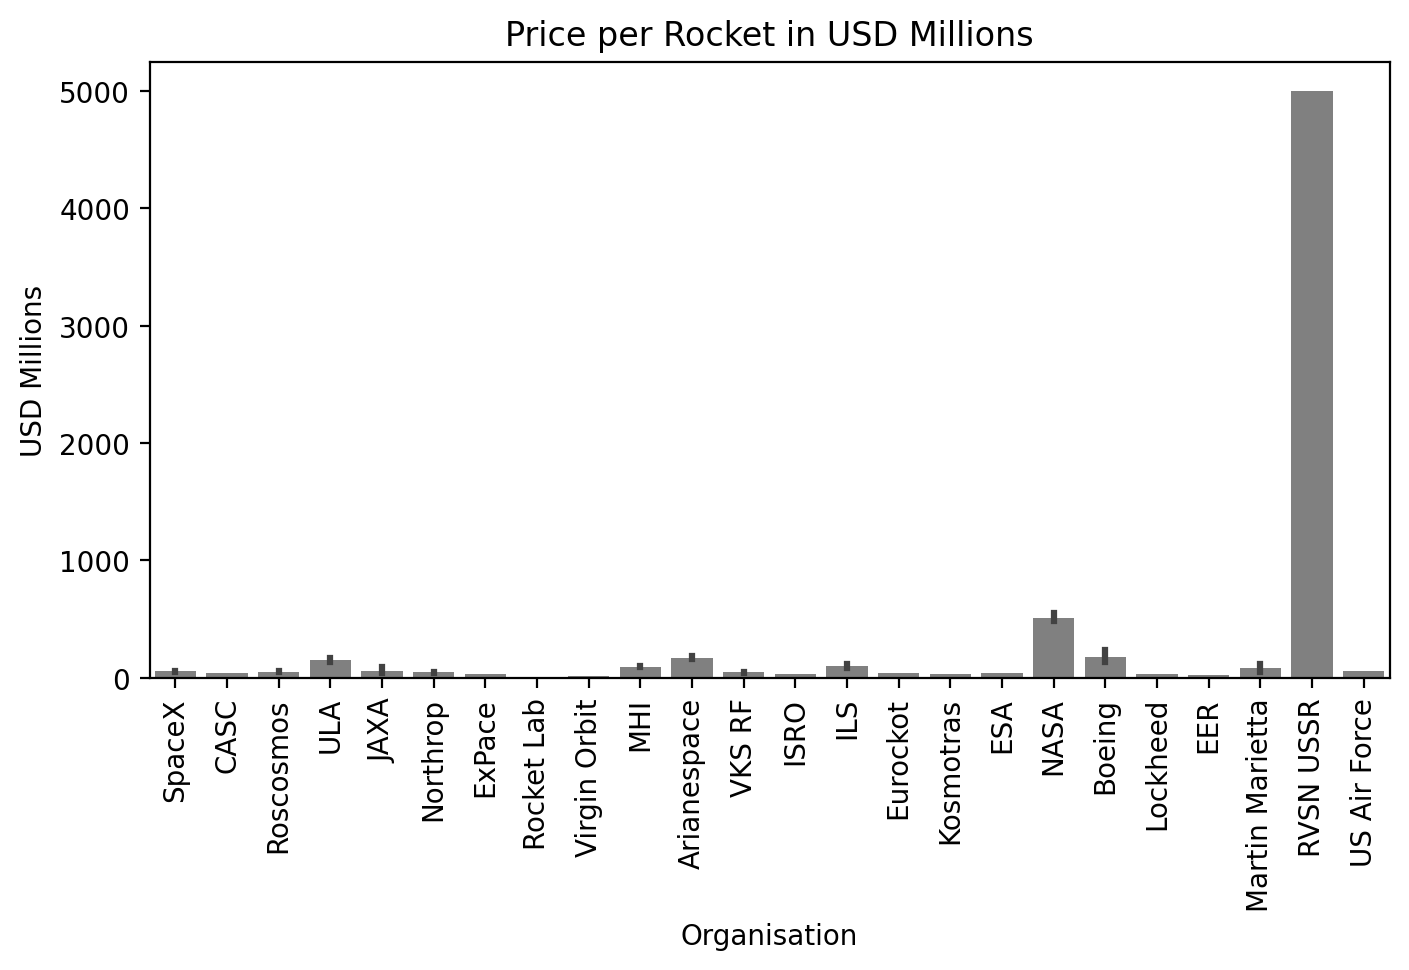

In [69]:

plt.figure(figsize=(8,4), dpi=200)
#sns.histplot(data=df_data, x=df_data.Price, bins=30)
sns.barplot(data=df_data, x='Organisation',y='Price', color='gray')
#plt.xlabel('Rocket Name')
plt.xticks(rotation=90)

plt.ylabel('USD Millions')

plt.title('Price per Rocket in USD Millions')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [23]:
df_data['Country']=df_data['Location'].str.split().str[-1]

df_data['Country']=df_data['Country'].str.replace('Zealand','New Zealand')
df_data['Country']=df_data['Country'].str.replace('Russia','RUSSIAN FEDERATION')
df_data['Country']=df_data['Country'].str.replace('Sea','China')
df_data['Country']=df_data['Country'].str.replace('Canaria','USA')

df_data['Alpha-3'] = df_data['Country'].apply(lambda x: countries.get(x).alpha3)



<ipython-input-23-df170d15fb91>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-df170d15fb91>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-df170d15fb91>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-df170d1

In [24]:
df_countries=df_data.groupby(['Country', 'Alpha-3'], as_index=False).agg({'Detail':pd.Series.count})
df_countries.sort_values('Detail', ascending=False)

,Country,Alpha-3,Detail
7,USA,USA,488
0,China,CHN,158
1,France,FRA,95
2,India,IND,66
6,RUSSIAN FEDERATION,RUS,54
4,Kazakhstan,KAZ,44
3,Japan,JPN,40
5,New Zealand,NZL,13


In [25]:
map_by_Rocket = px.choropleth(df_countries, locations='Alpha-3', color='Detail', hover_name='Country', color_continuous_scale=px.colors.sequential.matter)
map_by_Rocket.update_layout(coloraxis_showscale=True)
map_by_Rocket.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [26]:
df_failed=df_data[df_data['Mission_Status']=='Failure'].groupby(['Country', 'Alpha-3'], as_index=False).agg({'Mission_Status':pd.Series.count})
df_failed.sort_values('Mission_Status', ascending=False)

,Country,Alpha-3,Mission_Status
6,USA,USA,18
2,India,IND,5
0,China,CHN,4
1,France,FRA,2
3,Kazakhstan,KAZ,2
4,New Zealand,NZL,2
5,RUSSIAN FEDERATION,RUS,1


In [27]:
map_by_failed = px.choropleth(df_failed, locations='Alpha-3', color='Mission_Status', hover_name='Country', color_continuous_scale=px.colors.sequential.matter)
map_by_failed.update_layout(coloraxis_showscale=True)
map_by_failed.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [28]:
df_coun_org_stat=df_data.groupby(['Country','Organisation','Mission_Status'], as_index=False).agg({'Detail':pd.Series.count})
df_coun_org_stat.sort_values('Detail', ascending=False)

burst = px.sunburst(df_coun_org_stat,
                    path=['Country','Organisation','Mission_Status'],
                    values='Detail',
                    title='Rocket launch Description'
                    )
burst.update_layout(xaxis_title='Number of Rocket',
                    yaxis_title='Organization',
                    coloraxis_showscale=False)
burst.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [29]:
df_organization_amount=df_data.groupby(['Organisation'], as_index=False).agg({'Price':pd.Series.sum})
df_organization_amount.sort_values('Price',ascending=False)

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
20,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,334.96"
19,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,146.00"
22,VKS RF,"1,548.90"


# Analyse the Amount of Money Spent by Organisation per Launch

In [30]:
df_organization_amount=df_data.groupby(['Organisation'], as_index=False).agg(Rocket_count=('Detail', 'count'),Price_Sum=('Price', 'sum'))
df_organization_amount['Cost_per_Rocket']=df_organization_amount['Price_Sum']/df_organization_amount['Rocket_count']
df_organization_amount.sort_values(['Rocket_count','Price_Sum','Cost_per_Rocket'],ascending=False)

,Organisation,Rocket_count,Price_Sum,Cost_per_Rocket
2,CASC,157,"6,334.96",40.35
14,NASA,149,"76,280.00",511.95
19,SpaceX,99,"5,444.00",54.99
20,ULA,98,"14,798.00",151.00
0,Arianespace,96,"16,345.00",170.26
15,Northrop,83,"3,930.00",47.35
8,ISRO,66,"2,146.00",32.52
12,MHI,37,"3,532.50",95.47
22,VKS RF,33,"1,548.90",46.94
21,US Air Force,25,"1,491.92",59.68


# Chart the Number of Launches per Year

<ipython-input-64-4b49ec1633ee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



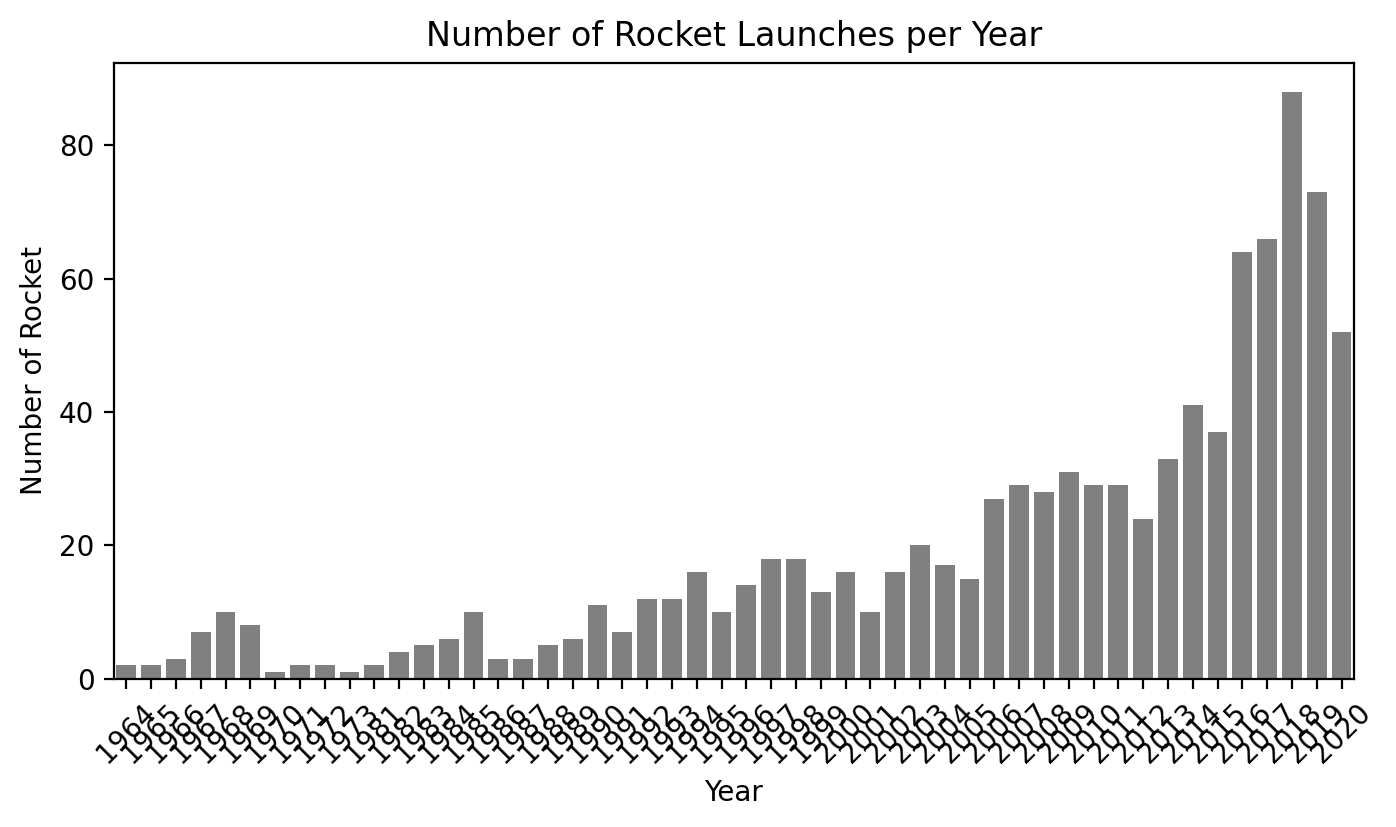

In [64]:
df_data['Year']=df_data.Date.dt.year
df_launch_per_year = df_data.groupby('Year',as_index=False).agg({'Detail':pd.Series.count})
df_launch_per_year.sort_values('Detail', ascending=False)


plt.figure(figsize=(8,4), dpi=200)
#sns.histplot(data=df_launch_per_year,x=df_launch_per_year.Year,y=df_launch_per_year.Detail, bins=25)
sns.barplot(data=df_launch_per_year,x='Year',y='Detail', color='gray')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.ylabel('Number of Rocket')

plt.title('Number of Rocket Launches per Year')
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

<ipython-input-61-a8bcaf751b74>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



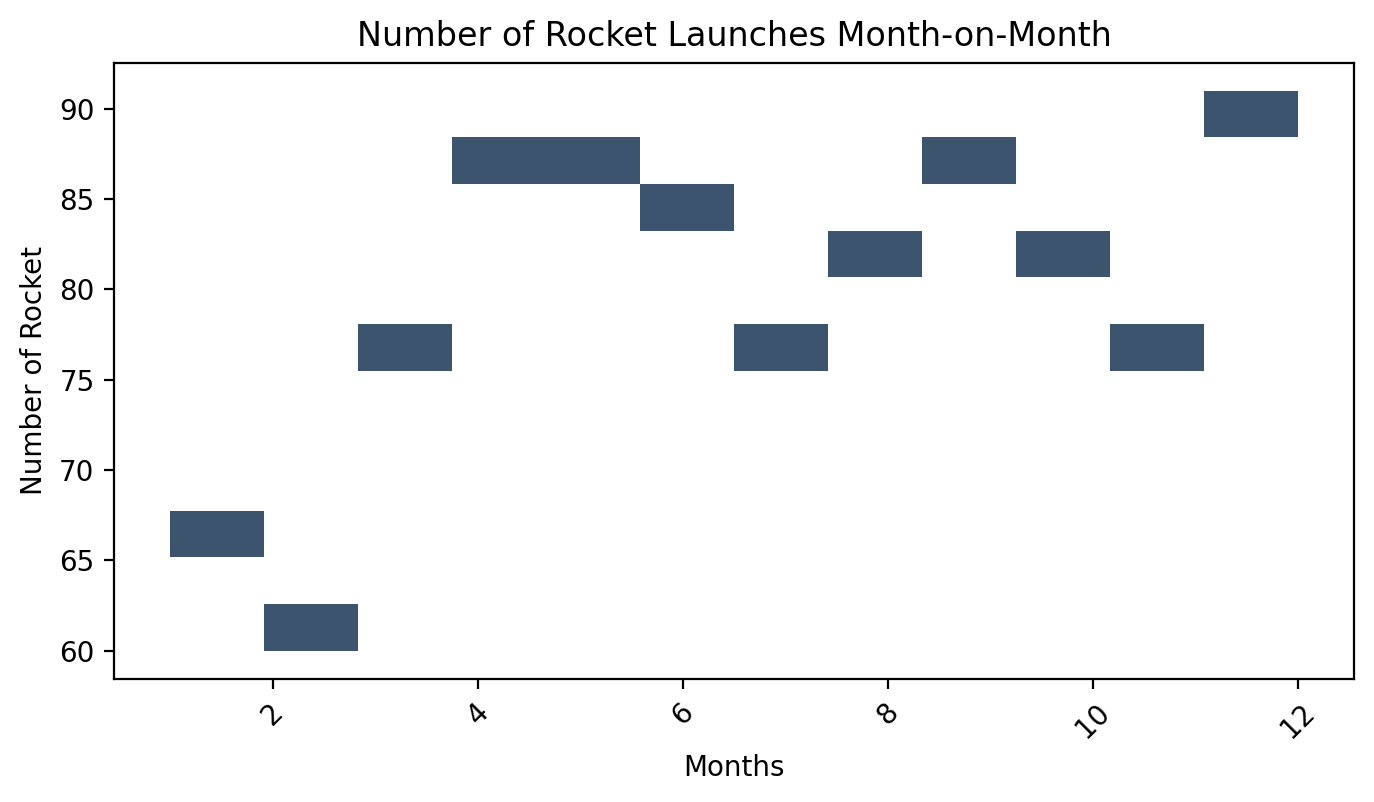

In [61]:
df_data['Month']=df_data.Date.dt.month
df_launch_month_on_month = df_data.groupby('Month',as_index=False).agg({'Detail':pd.Series.count})
df_launch_month_on_month.sort_values('Detail', ascending=False)

plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_launch_month_on_month,x=df_launch_month_on_month.Month,y=df_launch_month_on_month.Detail, bins=12)
# sns.barplot(data=df_launch_month_on_month,x='Month',y='Detail', color='gray')
plt.xlabel('Months')
plt.xticks(rotation=45)

plt.ylabel('Number of Rocket')

plt.title('Number of Rocket Launches Month-on-Month')
plt.show()



# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [33]:
df_data['Month']=df_data.Date.dt.month
df_launch_month_on_month = df_data.groupby('Month',as_index=False).agg({'Detail':pd.Series.count})
df_launch_month_on_month.sort_values('Detail', ascending=False)

# -----------Max Popular Month
max_mission_month = df_launch_month_on_month.loc[df_launch_month_on_month['Detail'].idxmax(),'Month']
print(f'Which time of year seems to be best for space missions? \nAnswer: {max_mission_month}')

# -----------Less Popular Month
min_mission_month = df_launch_month_on_month.loc[df_launch_month_on_month['Detail'].idxmin(),'Month']
print(f'Which time of year seems to be Worst for space missions? \nAnswer: {min_mission_month}')

Which time of year seems to be best for space missions? 
Answer: 12
Which time of year seems to be Worst for space missions? 
Answer: 2


<ipython-input-33-90e6b377d4f7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

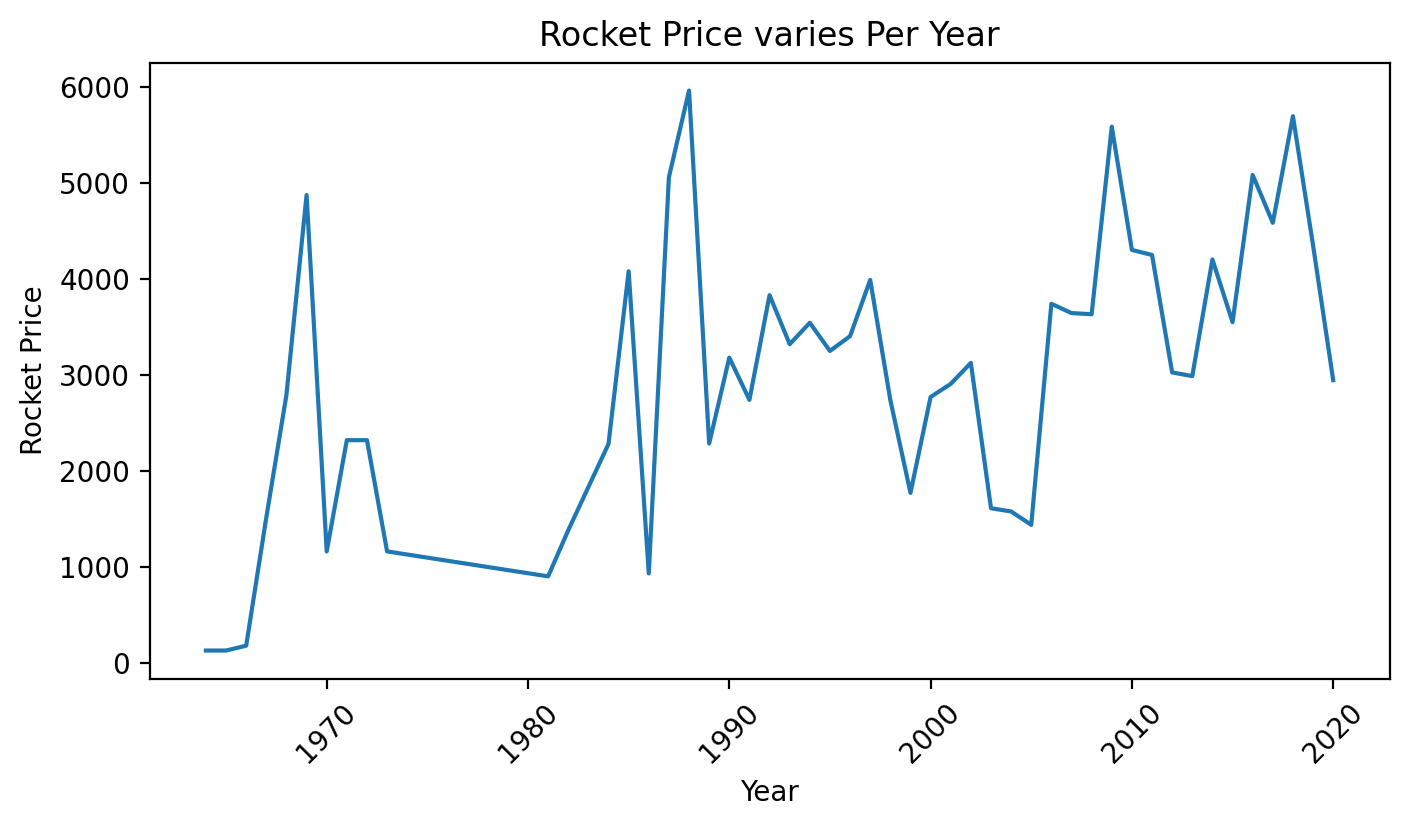

In [34]:
df_launch_price_per_year=df_data.groupby(['Year'], as_index=False).agg({'Price':pd.Series.sum})
df_launch_price_per_year.sort_values('Price',ascending=False)

plt.figure(figsize=(8,4), dpi=200)
plt.plot(df_launch_price_per_year.Year,df_launch_price_per_year.Price)
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.ylabel('Rocket Price')

plt.title('Rocket Price varies Per Year')
plt.show()


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [35]:
top_organizations = df_data['Organisation'].value_counts().head(10).index

df_top_org=df_data.groupby(['Organisation','Year'], as_index=False).agg(Rocket_count=('Detail', 'count'))
df_top_org=df_top_org.sort_values('Rocket_count', ascending=False)
df_top_org=df_top_org[df_top_org['Organisation'].isin(top_organizations)]
df_top_org
#df_organization_amount['Cost_per_Rocket']=df_organization_amount['Price_Sum']/df_organization_amount['Rocket_count']
#df_organization_amount.sort_values(['Rocket_count','Price_Sum','Cost_per_Rocket'],ascending=False)

,Organisation,Year,Rocket_count
47,CASC,2018,27
225,SpaceX,2018,21
48,CASC,2019,21
224,SpaceX,2017,18
49,CASC,2020,16
...,...,...,...
130,MHI,2019,1
121,MHI,2010,1
118,MHI,2006,1
117,MHI,2002,1


In [36]:
bursts = px.sunburst(df_top_org,
                    path=['Organisation','Year','Rocket_count'],
                    values='Rocket_count',
                    title='Launch of top 10 Organization'
                    )
bursts.update_layout(xaxis_title='Year',
                    yaxis_title='Organization',
                    coloraxis_showscale=False)
bursts.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [37]:
cold_war = df_data[df_data['Country'].isin(['USA','RUSSIAN FEDERATION'])]
cold_war
cold_war=cold_war.groupby(['Country','Year'], as_index=False).agg(Rocket_count=('Detail', 'count'))
cold_war.sort_values('Rocket_count', ascending=False)
cold_war=cold_war[cold_war['Year']<= 1991]
cold_war


,Country,Year,Rocket_count
20,USA,1964,2
21,USA,1965,2
22,USA,1966,3
23,USA,1967,7
24,USA,1968,10
25,USA,1969,8
26,USA,1970,1
27,USA,1971,2
28,USA,1972,2
29,USA,1973,1


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

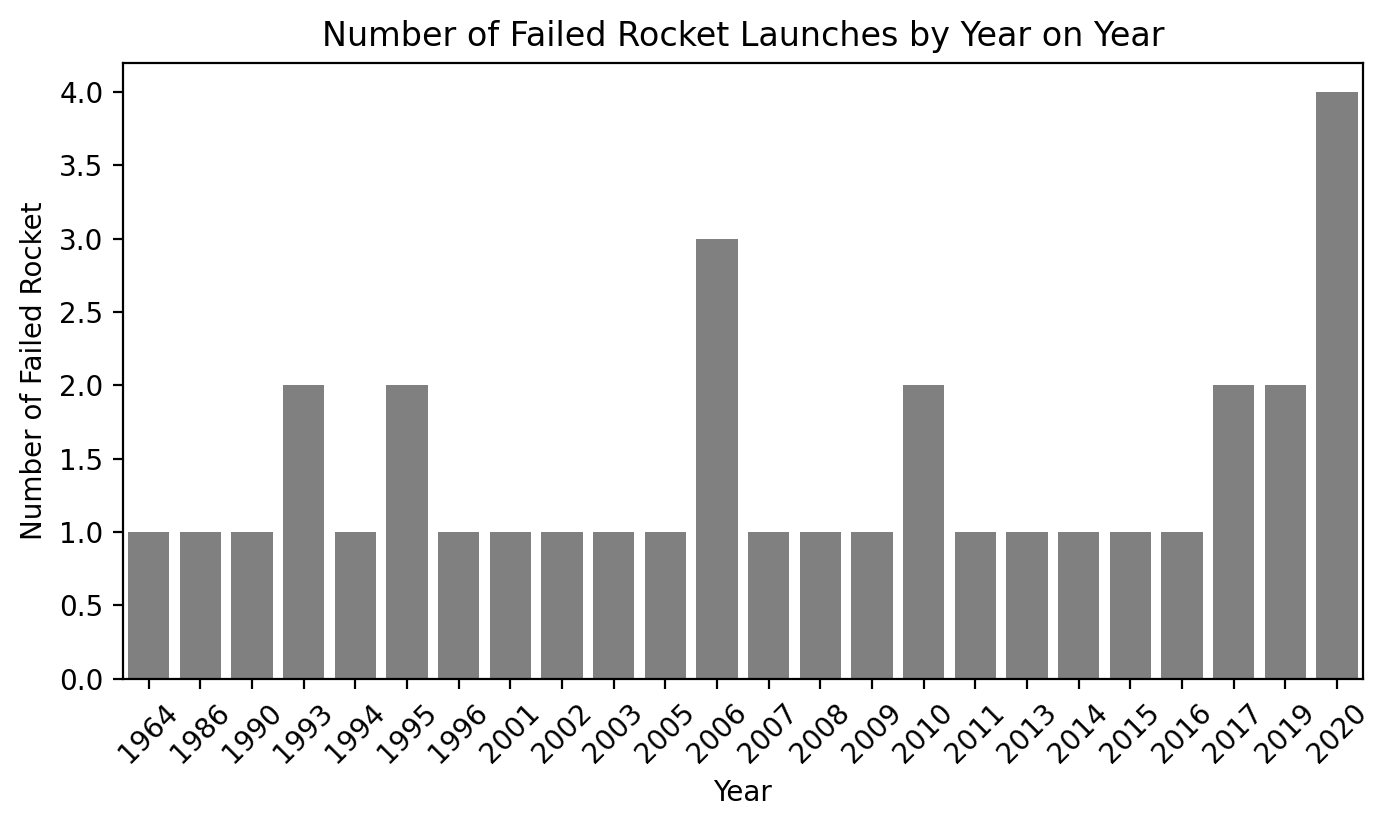

In [59]:
df_failed=df_data[df_data['Mission_Status']=='Failure']
failed_mission_year = df_failed.groupby(['Year'], as_index=False).agg({'Mission_Status':pd.Series.count})
failed_mission_year.sort_values('Mission_Status', ascending=False)


plt.figure(figsize=(8,4), dpi=200)
sns.barplot(data=failed_mission_year,x='Year', y='Mission_Status', color='gray')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.ylabel('Number of Failed Rocket')

plt.title('Number of Failed Rocket Launches by Year on Year')
plt.show()





ValueError: All arguments should have the same length. The length of argument `wide_variable_0` is 2, whereas the length of  previously-processed arguments ['y'] is 24

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [83]:
mission_rate_year = df_data.groupby(['Year'], as_index=False).agg(
    Success_mission=('Mission_Status', lambda x: (x=='Success').sum()),
    Failed_mission=('Mission_Status', lambda x: (x=='Failure').sum()))

mission_rate_year['Success_rate']=100-((mission_rate_year['Failed_mission']*100)/mission_rate_year['Success_mission'])
mission_rate_year['Failure_rate']=100-mission_rate_year['Success_rate']



mission_rate_year.sort_values('Year', ascending=False)



,Year,Success_mission,Failed_mission,Success_rate,Failure_rate
49,2020,48,4,91.67,8.33
48,2019,71,2,97.18,2.82
47,2018,87,0,100.00,0.00
46,2017,62,2,96.77,3.23
45,2016,61,1,98.36,1.64
44,2015,36,1,97.22,2.78
43,2014,40,1,97.50,2.50
42,2013,31,1,96.77,3.23
41,2012,23,0,100.00,0.00
40,2011,27,1,96.30,3.70


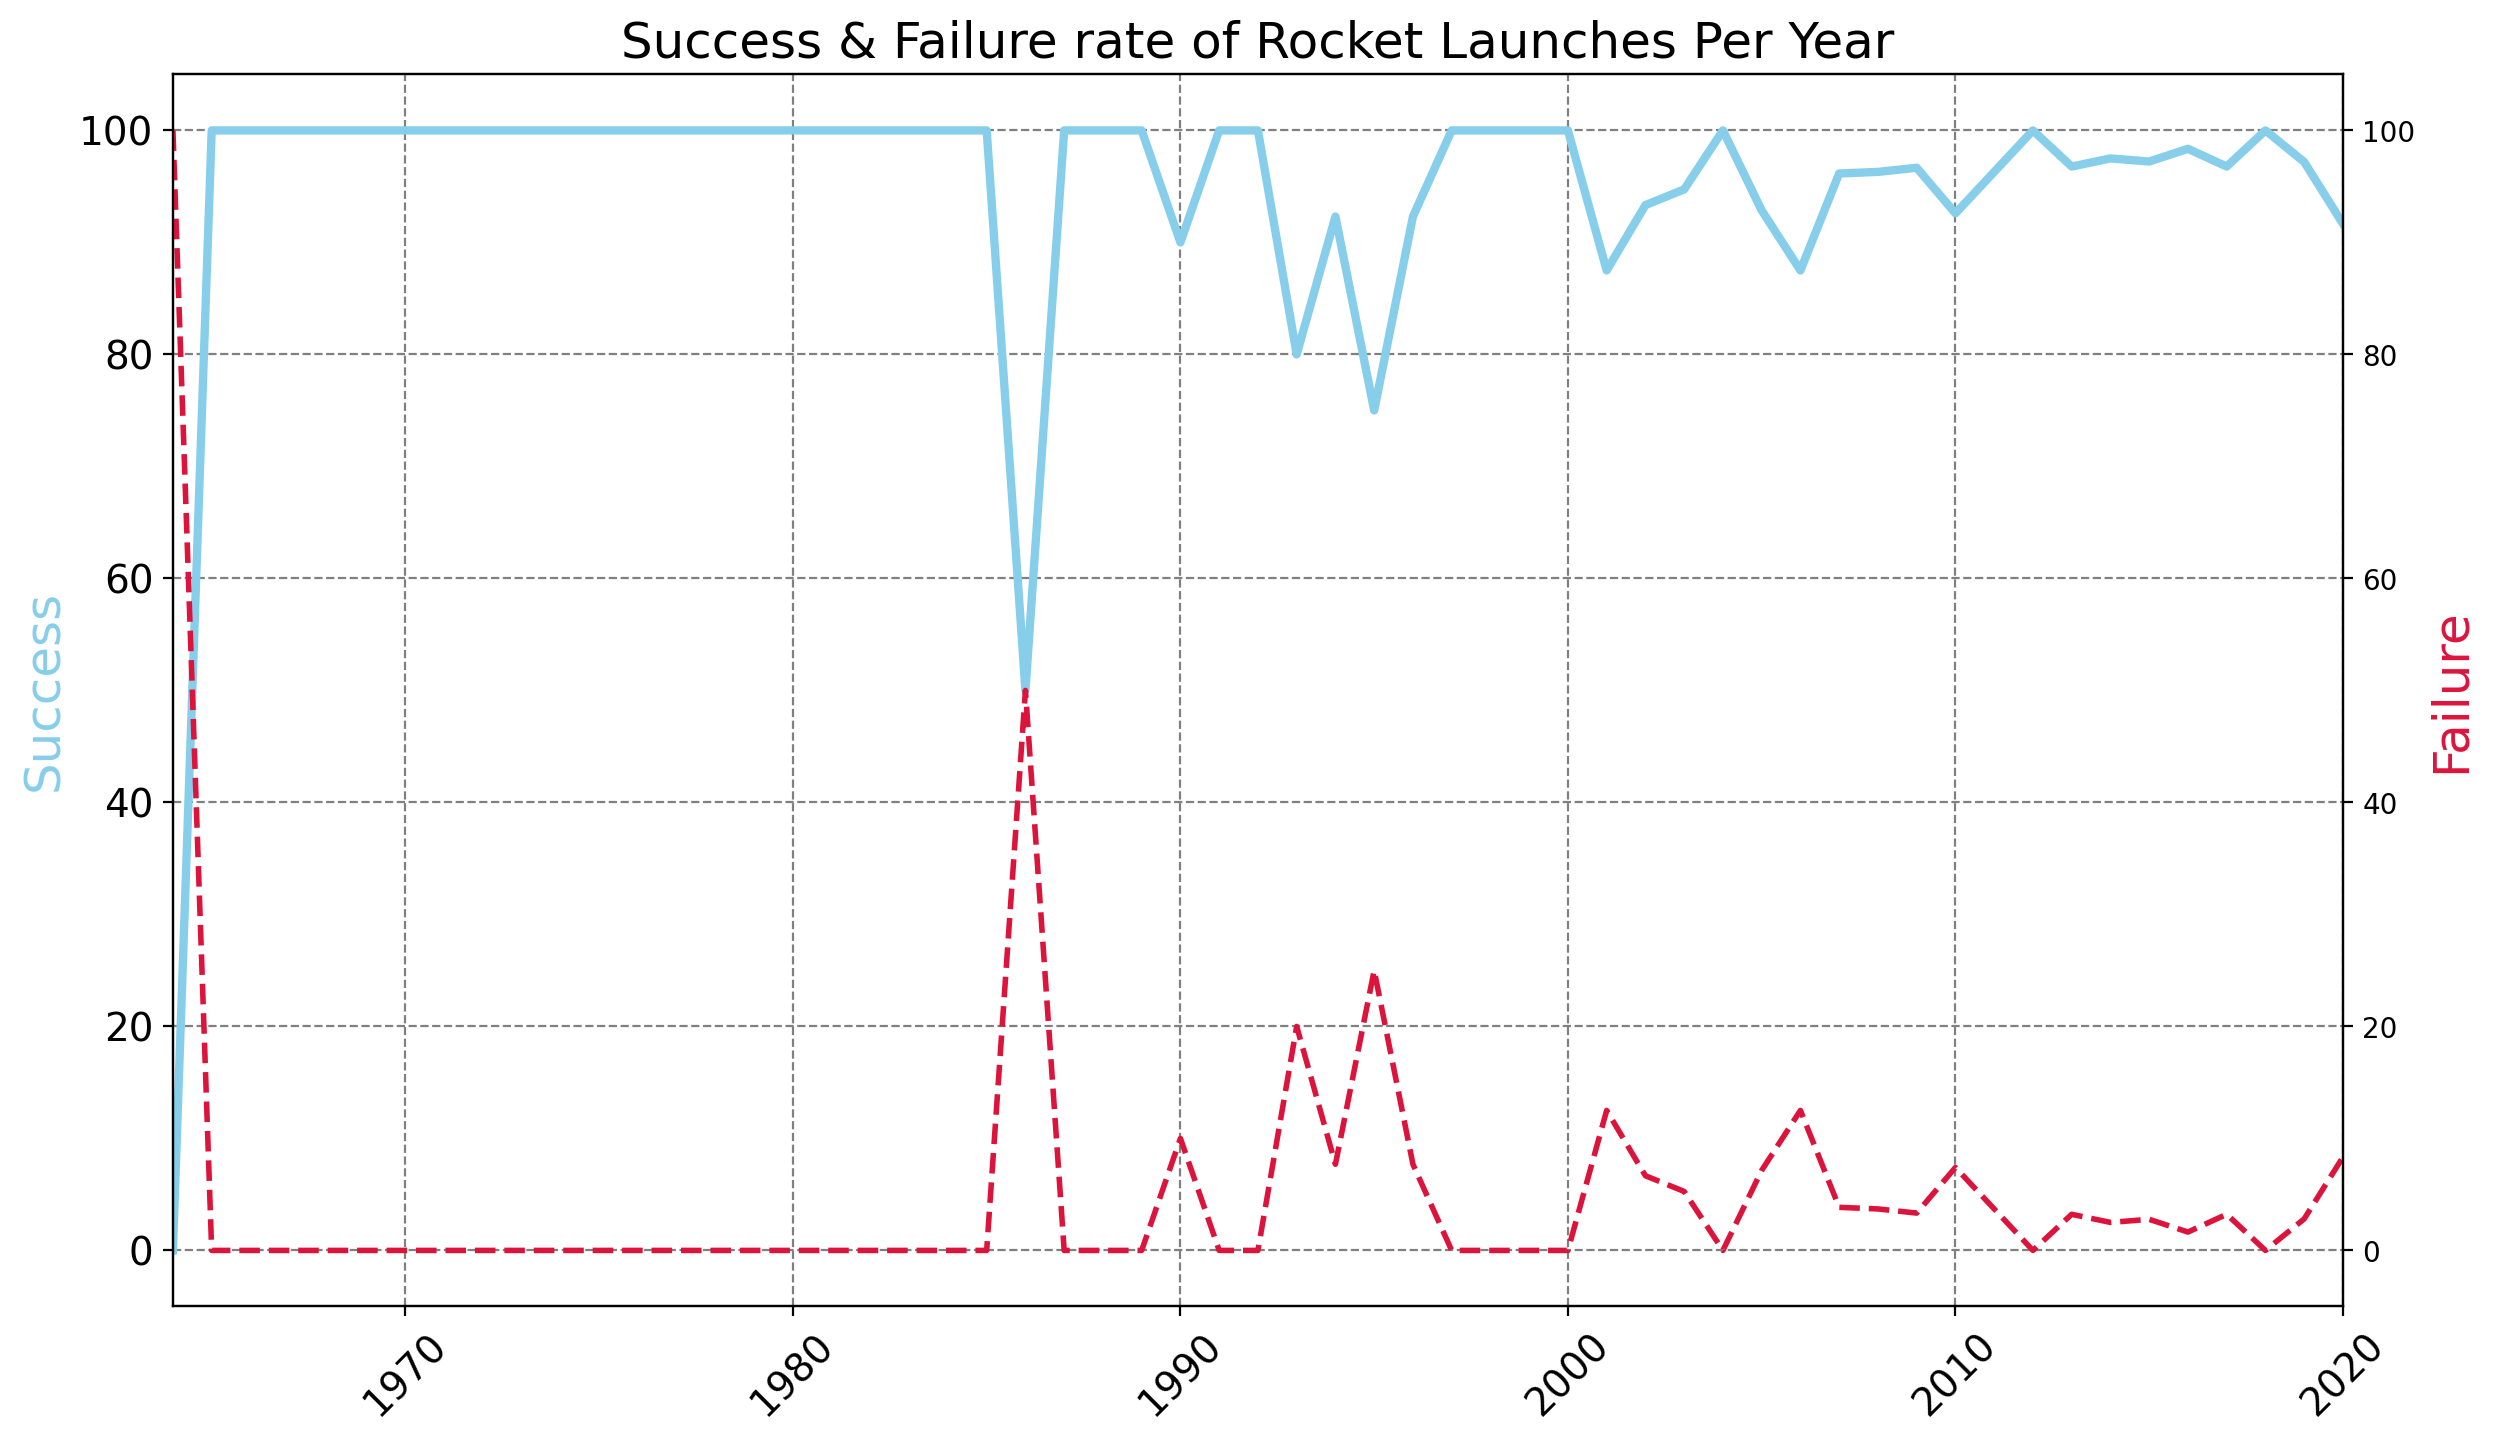

In [87]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Success & Failure rate of Rocket Launches Per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Success', color='skyblue', fontsize=18)
ax2.set_ylabel('Failure', color='crimson', fontsize=18)

# Use Locators
ax1.set_xlim([mission_rate_year.Year.min(), mission_rate_year.Year.max()])

ax1.grid(color='grey', linestyle='--')

ax1.plot(mission_rate_year.Year,
         mission_rate_year.Success_rate,
         color='skyblue',
         linewidth=3)

ax2.plot(mission_rate_year.Year,
         mission_rate_year.Failure_rate,
         color='crimson',
         linewidth=2,
         linestyle='--')

plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [93]:
df_leading_country = df_data.groupby(['Year', 'Country']).agg(success_launch=('Mission_Status', lambda x: (x == 'Success').sum())).reset_index()

# Find the leading country for successful launches for each year
df_leading_country = df_leading_country.loc[df_leading_country.groupby('Year')['success_launch'].idxmax()]

# Reset index to clean up the DataFrame
df_leading_country.reset_index(drop=True, inplace=True)
df_leading_country


,Year,Country,success_launch
0,1964,USA,1
1,1965,USA,2
2,1966,USA,3
3,1967,USA,6
4,1968,USA,9
5,1969,USA,8
6,1970,USA,1
7,1971,USA,2
8,1972,USA,2
9,1973,USA,1


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [104]:
df_leading_country = df_data.groupby(['Year', 'Organisation']).agg(success_launch=('Mission_Status','count')).reset_index()

# Find the leading country for successful launches for each year
df_leading_country = df_leading_country.loc[df_leading_country.groupby('Year')['success_launch'].idxmax()]
df_leading_country = df_leading_country[(df_leading_country.Year >= 1970) & (df_leading_country.Year <= 1980)]
# Reset index to clean up the DataFrame
df_leading_country.reset_index(drop=True, inplace=True)
print(f'Which organisation was dominant in the 1970s and 1980s? \n{df_leading_country}')


,Year,Organisation,success_launch
0,1970,NASA,1
1,1971,NASA,2
2,1972,NASA,2
3,1973,NASA,1


In [105]:
df_leading_country = df_data.groupby(['Year', 'Organisation']).agg(success_launch=('Mission_Status','count')).reset_index()

# Find the leading country for successful launches for each year
df_leading_country = df_leading_country.loc[df_leading_country.groupby('Year')['success_launch'].idxmax()]
df_leading_country = df_leading_country[(df_leading_country.Year >= 2018) & (df_leading_country.Year <= 2020)]
# Reset index to clean up the DataFrame
df_leading_country.reset_index(drop=True, inplace=True)
print(f'Which organisation was dominant in 2018, 2019 and 2020? \n{df_leading_country}')

Which organisation was dominant in 2018, 2019 and 2020? 
   Year Organisation  success_launch
0  2018         CASC              27
1  2019         CASC              21
2  2020         CASC              16
